In [1]:
import pandas as pd
df = pd.read_csv('Downloads\MagicTelescope-1.csv')
from sklearn import preprocessing
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
df.loc[:,'class'] = en.transform(df['class'])

In [2]:
target = df['class']
inputs = df.drop('class', axis = 'columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.1 )

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score: ', model.score(X_test, y_test))

Accuracy score:  0.8843322818086226


In [3]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1237
           1       0.89      0.77      0.82       665

    accuracy                           0.88      1902
   macro avg       0.89      0.86      0.87      1902
weighted avg       0.88      0.88      0.88      1902



In [4]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ', confusion)

Confusion matrix:  [[1172   65]
 [ 155  510]]


<AxesSubplot:>

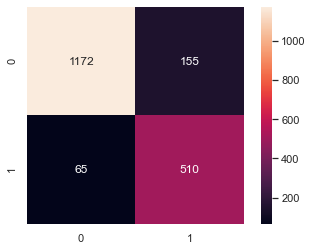

In [5]:
import seaborn as sns; sns.set()
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=True)

ROC 0.8571854049027174


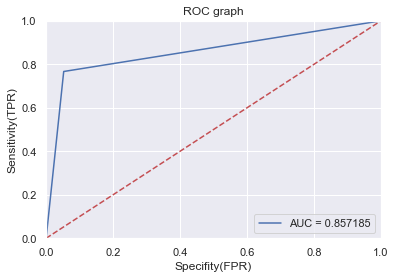

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc = auc(false_positive_rate, true_positive_rate)
print('ROC',roc)
plt.title('ROC graph')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.6f' %roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensitivity(TPR)')
plt.xlabel('Specifity(FPR)')
plt.show()

In [7]:
TP = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TN = confusion[1][1]
FP = FP.astype(float)
TP = TP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)

In [8]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print("TPR" ,TPR)
print("FPR" ,FPR)

TPR 0.8831951770911831
FPR 0.11304347826086956
